In [1]:
# python version  # conda version

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd #version 1.4.4
import sklearn as skl #version 1.0.2
import pandas_profiling as pp #version 3.6.6
import numpy as np #version 1.21.5
import matplotlib.pyplot as plt #version 3.5.2
import warnings as ww

from sklearn.model_selection import train_test_split #version 1.0.2
from sklearn.linear_model import LogisticRegression #version1.0.2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #version 1.0.2
from sklearn import metrics #version 1.0.2
from sklearn.metrics import accuracy_score #version 1.0.2
from sklearn.metrics import precision_score #version 1.0.2
from sklearn.metrics import recall_score #version 1.0.2
from sklearn.metrics import confusion_matrix #version 1.0.2
from sklearn.metrics import roc_auc_score #version 1.0.2
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
ww.filterwarnings("ignore")

%matplotlib inline

/var/folders/00/zf18np857gbg8pz_r_jnmjsw0000gn/T/ipykernel_94274/906594711.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp #version 3.6.6


In [4]:
original_data = pd.read_csv("/Users/christinegurek/Desktop/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/loan_default_data_set.csv")
original_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.11010,14819.057400,238,104,264,0,0,0,0.000000,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.000000,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.000000,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.000000,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.000000,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1


In [5]:
original_data["pct_card_over_50_uti"] = original_data["pct_card_over_50_uti"].fillna(original_data["pct_card_over_50_uti"].mean())
original_data["rep_income"] = original_data["rep_income"].fillna(original_data["rep_income"].mean())
original_data = original_data.dropna()

In [6]:
original_data['rep_education'] = original_data['rep_education'].replace(['high_school'], '0')
original_data['rep_education'] = original_data['rep_education'].replace(['college'], '1')
original_data['rep_education'] = original_data['rep_education'].replace(['graduate'], '2')
original_data['rep_education'] = original_data['rep_education'].replace(['other'], '3')
original_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.11010,14819.057400,238,104,264,0,0,0,0.000000,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.321300,1,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.000000,0,...,0,0,0.490809,0.540671,0.418016,0.550964,0,89365.057650,1,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.000000,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.121300,1,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.000000,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.485500,1,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.000000,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.367900,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,166373.900129,0,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,0.550964,1,166373.900129,0,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,0.550964,0,157706.158100,1,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.974140,1,1


In [7]:
by_class = original_data.groupby('Def_ind')
defaulted = by_class.get_group(1)
not_defaulted = by_class.get_group(0)

# Part A

In [8]:
defaulted_b = resample(defaulted, random_state=7, n_samples = 16001, replace=True )
over_sampled_defaulted = pd.concat([defaulted_b, defaulted])
over_sampled_data = pd.concat([over_sampled_defaulted, not_defaulted])
over_sampled_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
1855,46848.83155,8347.161418,312,169,288,3,1,1,17250.047220,2,...,0,0,0.514084,0.488101,0.499706,0.553833,0,154619.766000,1,1
12253,72961.10494,7124.144631,201,146,216,1,0,0,258.347644,3,...,0,0,0.399851,0.601466,0.390277,0.469696,0,164922.506900,0,1
5383,145730.11340,13452.430260,145,94,116,1,0,0,0.000000,1,...,0,0,0.734532,0.692287,0.611596,0.784655,0,198679.564600,1,1
5097,167305.24000,14861.486870,261,149,268,1,0,0,0.000000,3,...,0,0,0.619819,0.638053,0.504725,0.570574,0,199746.646600,1,1
15951,87236.84616,6057.338602,255,155,291,0,0,0,0.000000,0,...,0,0,0.712308,0.690047,0.799142,0.707269,0,112857.380600,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,123398.85340,12685.051170,410,219,411,0,0,0,0.000000,0,...,0,0,0.598732,0.341668,0.625128,0.601800,1,159783.366200,1,0
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,166373.900129,0,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,0.550964,1,166373.900129,0,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,0.550964,0,157706.158100,1,0


# Part B

In [9]:
not_defaulted_b = resample(not_defaulted, random_state=7, n_samples = 2000, replace=True )
under_sampled_data = pd.concat([not_defaulted_b, defaulted])
under_sampled_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
18806,131225.73800,20357.253950,309,173,308,0,0,0,0.000000,0,...,0,0,0.430667,0.439076,0.594488,0.516106,0,216649.10380,1,0
11918,80133.56007,9875.799388,395,179,370,0,0,0,0.000000,0,...,0,0,0.364719,0.357839,0.092990,0.459671,0,186461.40720,0,0
6339,87845.92410,9731.591654,277,148,312,0,0,0,0.000000,0,...,1,0,0.595074,0.466512,0.473781,0.550964,0,220363.91940,1,0
998,63206.06575,9013.939394,221,155,285,0,0,0,0.000000,0,...,1,0,0.412030,0.536783,0.543726,0.550964,0,123476.65670,0,0
15481,122061.65840,10046.839150,386,188,286,0,0,0,0.000000,2,...,0,0,0.433056,0.459339,0.468154,0.566470,0,175396.28280,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,101185.23900,8551.413462,344,190,361,1,0,0,0.000000,0,...,0,0,0.517914,0.508975,0.501642,0.630670,0,137004.08820,1,1
19979,101238.81730,12260.749900,148,52,218,0,0,0,0.000000,1,...,1,0,0.902818,0.794570,0.929545,0.984288,1,158403.48710,0,1
19984,109717.64730,12295.671170,129,60,226,0,0,0,0.000000,3,...,0,0,0.688392,0.763726,0.816987,0.749705,0,199402.46450,1,1
19994,99102.92799,11033.901590,222,119,259,0,0,0,0.000000,0,...,0,0,0.591720,0.681487,0.631201,0.660454,0,167343.82270,2,1


# Part C

In [10]:
x_3 = original_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y_3 = original_data["Def_ind"]
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size = 0.30, random_state=3)
smote = SMOTE(random_state = 3)
x_train_res, y_train_res = smote.fit_resample(x_train_3, y_train_3.ravel())
print(x_train_res.shape)
print(y_train_res.shape)

(25184, 20)
(25184,)


In [11]:
y_1 = over_sampled_data["Def_ind"]
x_1 = over_sampled_data.loc[:, over_sampled_data.columns != "Def_ind"] 
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=7)

In [12]:
# oversampled Logistic Regression
LR_model_1 = LogisticRegression()
LR_model_1.fit(x_train_1, y_train_1)
y_pred_1 = LR_model_1.predict(x_test_1)
y_pred_1

array([0, 1, 0, ..., 0, 1, 0])

In [13]:
#oversampled Linear Discriminant Analysis 
LDA_model_1 = LinearDiscriminantAnalysis()
LDA_model_1.fit(x_train_1, y_train_1)
y_pred_2 = LDA_model_1.predict(x_test_1)
y_pred_2

array([1, 1, 1, ..., 1, 0, 0])

In [14]:
y_2 = under_sampled_data["Def_ind"]
x_2 = under_sampled_data.loc[:, under_sampled_data.columns != "Def_ind"] 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=7)

In [15]:
# undersampled Logistic Regression

LR_model_2 = LogisticRegression()
LR_model_2.fit(x_train_2, y_train_2)
y_pred_3 = LR_model_2.predict(x_test_2)
y_pred_3


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
# undersampled Linear Discriminant Analysis
LDA_model_2 = LinearDiscriminantAnalysis()
LDA_model_2.fit(x_train_2, y_train_2)
y_pred_4 = LDA_model_2.predict(x_test_2)
y_pred_4

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [17]:
# SMOTE Logistic Regression
LR_model_3 = LogisticRegression()
LR_model_3.fit(x_train_res, y_train_res)
y_pred_5 = LR_model_3.predict(x_test_3)
y_pred_5

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# SMOTE Linear Discriminant Analysis
LDA_model_3 = LinearDiscriminantAnalysis()
LDA_model_3.fit(x_train_res, y_train_res)
y_pred_6 = LDA_model_3.predict(x_test_3)
y_pred_6

array([1, 1, 0, ..., 0, 1, 1])

In [19]:
# accuracy metrics
accuracy_LR_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_LDA_1 = accuracy_score(y_test_1, y_pred_2)
accuracy_LR_2 = accuracy_score(y_test_2, y_pred_3)
accuracy_LDA_2 = accuracy_score(y_test_2, y_pred_4)
accuracy_LR_3 = accuracy_score(y_test_3, y_pred_5)
accuracy_LDA_3 = accuracy_score(y_test_3, y_pred_6)

precision_LR_1 = precision_score(y_test_1, y_pred_1, average='micro')
precision_LDA_1 = precision_score(y_test_1, y_pred_2, average='micro')
precision_LR_2 = precision_score(y_test_2, y_pred_3, average='micro')
precision_LDA_2 = precision_score(y_test_2, y_pred_4, average='micro')
precision_LR_3 = precision_score(y_test_3, y_pred_5, average='micro')
precision_LDA_3 = precision_score(y_test_3, y_pred_6, average='micro')

recall_LR_1 = recall_score(y_test_1, y_pred_1, average='micro')
recall_LDA_1 = recall_score(y_test_1, y_pred_2, average='micro')
recall_LR_2 = recall_score(y_test_2, y_pred_3, average='micro')
recall_LDA_2 = recall_score(y_test_2, y_pred_4, average='micro')
recall_LR_3 = recall_score(y_test_3, y_pred_5, average='micro')
recall_LDA_3 = recall_score(y_test_3, y_pred_6, average='micro')

In [27]:
print("Oversampled Accuracy score for Logistic Regression Model: " + str(accuracy_LR_1))
print("Oversampled Accuracy score for Linear Discriminant Analysis Model: " + str(accuracy_LDA_1))
print("Undersampled Accuracy score for Logistic Regression Model: " + str(accuracy_LR_2))
print("Undersmapled Accuracy score for Linear Discriminant Model: " + str(accuracy_LDA_2))
print("SMOTE Accuracy score for Logistic Regression Model: " + str(accuracy_LR_3))
print("SMOTE Accuracy score for Linear Discriminant Analysis Model: " + str(accuracy_LDA_3))
print( "   ")
print("Oversampled Precision score for Logistic Regression Model: " + str(precision_LR_1))
print("Oversampled Precision score for Linear Discriminant Analysis Model: " + str(precision_LDA_1))
print("Undersampled Precision score for Logistic Regression Model: " + str(precision_LR_2))
print("Undersmapled Precision score for Linear Discriminant Model: " + str(precision_LDA_2))
print("SMOTE Precision score for Logistic Regression Model: " + str(precision_LR_3))
print("SMOTE Precision score for Linear Discriminant Analysis Model: " + str(precision_LDA_3))
print("   ")
print("Oversampled Recall score for Logistic Regression Model: " + str(recall_LR_1))
print("Oversampled Recall score for Linear Discriminant Analysis Model: " + str(recall_LDA_1))
print("Undersampled Recall score for Logistic Regression Model: " + str(recall_LR_2))
print("Undersmapled Recall score for Linear Discriminant Model: " + str(recall_LDA_2))
print("SMOTE Recall score for Logistic Regression Model: " + str(recall_LR_3))
print("SMOTE Recall score for Linear Discriminant Analysis Model: " + str(recall_LDA_3))

Oversampled Accuracy score for Logistic Regression Model: 0.6436111111111111
Oversampled Accuracy score for Linear Discriminant Analysis Model: 0.7219444444444445
Undersampled Accuracy score for Logistic Regression Model: 0.67625
Undersmapled Accuracy score for Linear Discriminant Model: 0.725
SMOTE Accuracy score for Logistic Regression Model: 0.7168333333333333
SMOTE Accuracy score for Linear Discriminant Analysis Model: 0.7018333333333333
   
Oversampled Precision score for Logistic Regression Model: 0.6436111111111111
Oversampled Precision score for Linear Discriminant Analysis Model: 0.7219444444444445
Undersampled Precision score for Logistic Regression Model: 0.67625
Undersmapled Precision score for Linear Discriminant Model: 0.725
SMOTE Precision score for Logistic Regression Model: 0.7168333333333333
SMOTE Precision score for Linear Discriminant Analysis Model: 0.7018333333333333
   
Oversampled Recall score for Logistic Regression Model: 0.6436111111111111
Oversampled Recall 

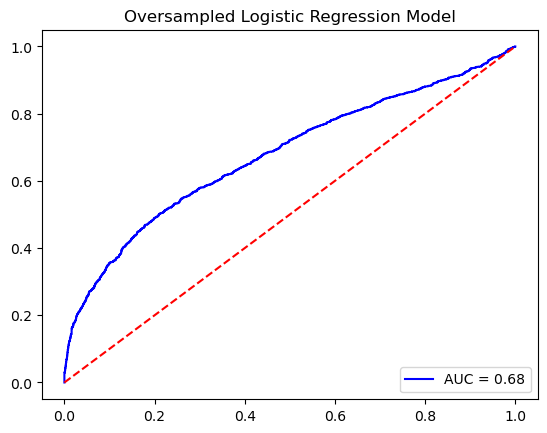

In [21]:
# roc/auc curve
probs = LR_model_1.predict_proba(x_test_1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("Oversampled Logistic Regression Model")
plt.legend(loc = 'lower right')
plt.show()

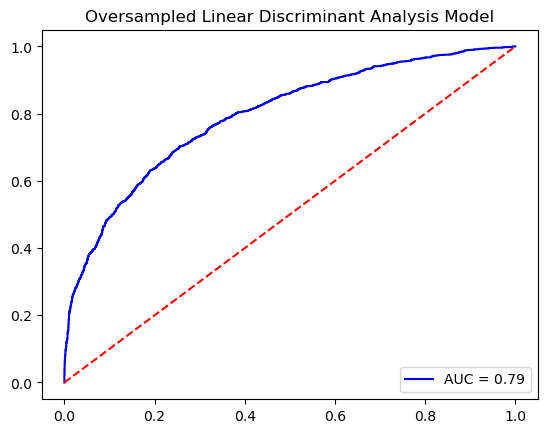

In [22]:
probs = LDA_model_1.predict_proba(x_test_1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("Oversampled Linear Discriminant Analysis Model")
plt.legend(loc = 'lower right')
plt.show()

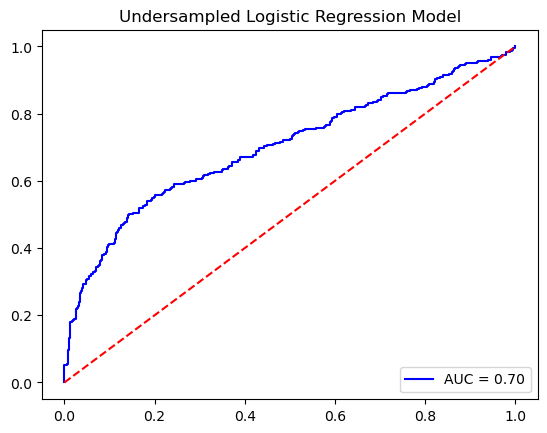

In [23]:
probs = LR_model_2.predict_proba(x_test_2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_2, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("Undersampled Logistic Regression Model")
plt.legend(loc = 'lower right')
plt.show()

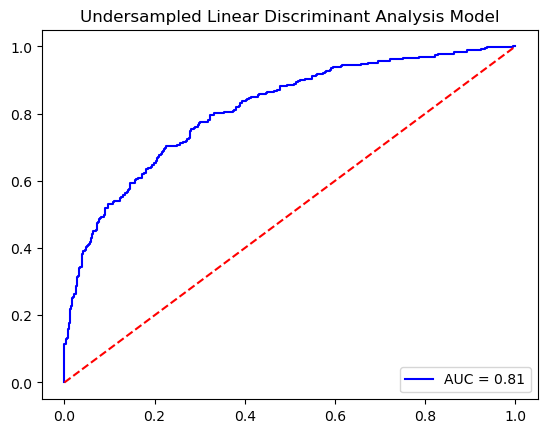

In [24]:
probs = LDA_model_2.predict_proba(x_test_2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_2, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("Undersampled Linear Discriminant Analysis Model")
plt.legend(loc = 'lower right')
plt.show()

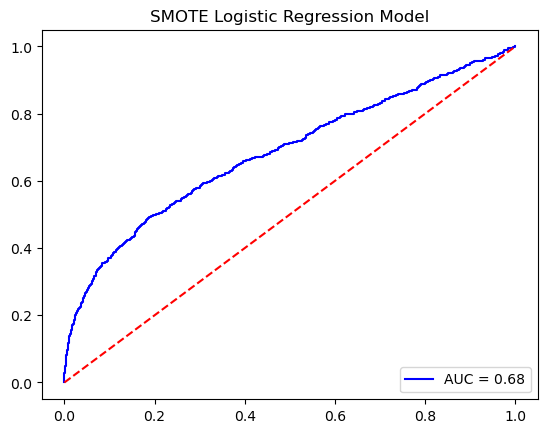

In [25]:
probs = LR_model_3.predict_proba(x_test_3)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_3, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("SMOTE Logistic Regression Model")
plt.legend(loc = 'lower right')
plt.show()

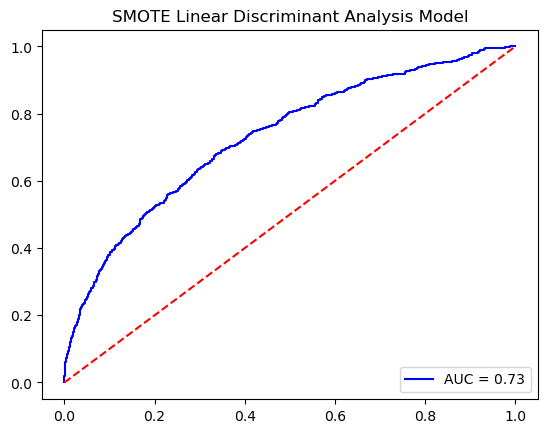

In [26]:
probs = LDA_model_3.predict_proba(x_test_3)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_3, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.title("SMOTE Linear Discriminant Analysis Model")
plt.legend(loc = 'lower right')
plt.show()

5. I would personally prefer the Undersampled Linear Discriminant Analysis Model. It has the best accuracy, precision, recall, and AUC scores out of all of the models performed on the data, so it is probably the best model to use for this data set. 